## Getting started with Purelung package

In [ ]:
pip install git+https://gitlab.com/internship-2020-ai-lab/super-resolution/augmentations.git@v1

Purelung augmentations can be applied to unit8 images, its bounding boxes, masks, and key points. Their requirements are as follows:

`bbox` : a bounding box in pascal voc format, e.g. [x_min, y_min, x_max, y_max].

`mask` : a mask for an input image.

`keypoints` : a list of points in 'xy' format, e.g. [(x, y), ...].

In [1]:
import albumentations as A
from purelung import augmentations as aug
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [2]:
def show_image(image):
    plt.figure(figsize=(9, 9))
    plt.imshow(image, cmap='gray')
    plt.show()

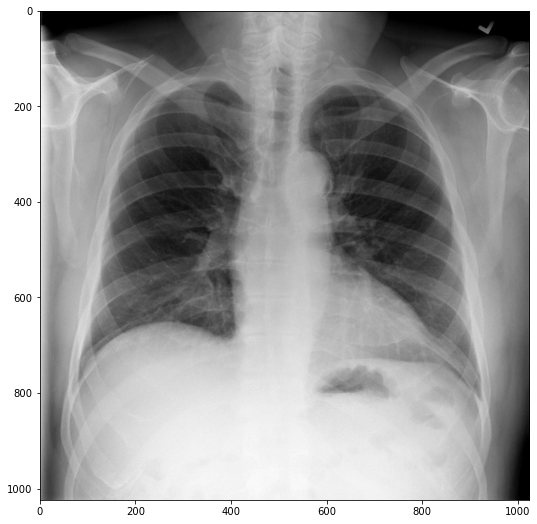

In [3]:
chest_img = cv2.imread(r'C:\Users\pc\Desktop\original.png', 0)
show_image(chest_img)

--------------------------------------------------

### Lung crop

Class `LungCrop(indent=5, auto_inverse=False)` used for context-aware image crop in the Chest X-ray images.


`indent` : an indent from the bounding box of lungs.

`auto_inverse` : a flag signalizing that the color inverse of an image should be performed if necessary.

`targets` : image, mask, bbox, key points.

`image types` : uint8.

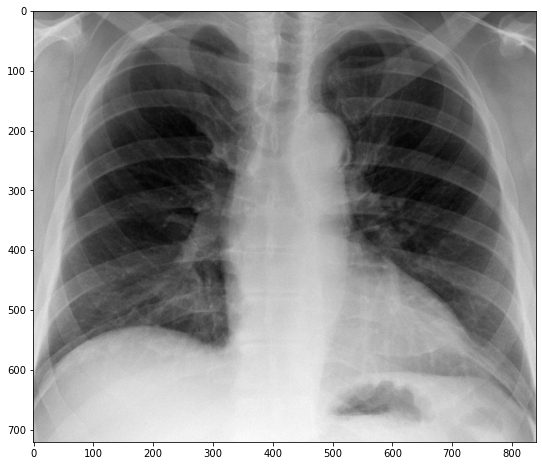

In [4]:
augmentation = aug.LungCrop()
augmented = augmentation(image=chest_img)['image']
show_image(augmented)

--------------------------------------

### Rib Suppression

Class `RibSuppression(equalize_out=False, auto_inverse=False)` used for suppressing bone shadows in the Chest X-ray images.

`equalize_out` : a flag signalizing that the Histograms Equalization should be performed.

`auto_inverse` : a flag signalizing that the color inverse of an image should be performed if necessary.

`targets` : image, mask, bbox, key points.

`image types` : uint8.

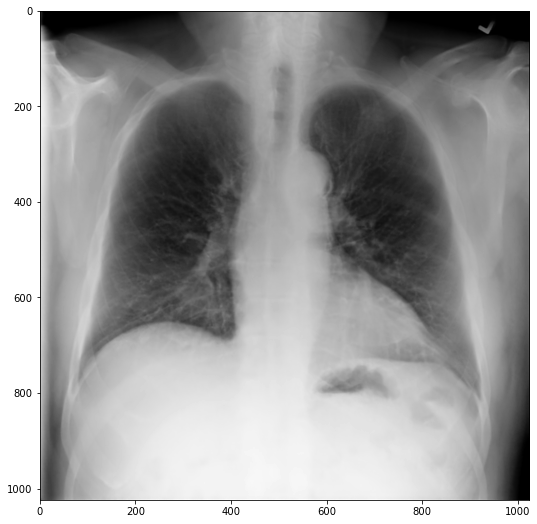

In [5]:
augmentation = aug.RibSuppression()
augmented = augmentation(image=chest_img)['image']
show_image(augmented)

--------------------------------------

### Segmentation

Class `Segmentation(auto_inverse=False, type=SegType.LUNGS)` used for segmentation of the Chest X-ray images.

`auto_inverse` : a flag signalizing that the color inverse of an image should be performed if necessary.

`type` : segmentation type, either SegType.LUNGS or SegType.HEART or SegType.CLAVICLES.

`targets` : image, mask, bbox, key points.

`image types` : uint8.

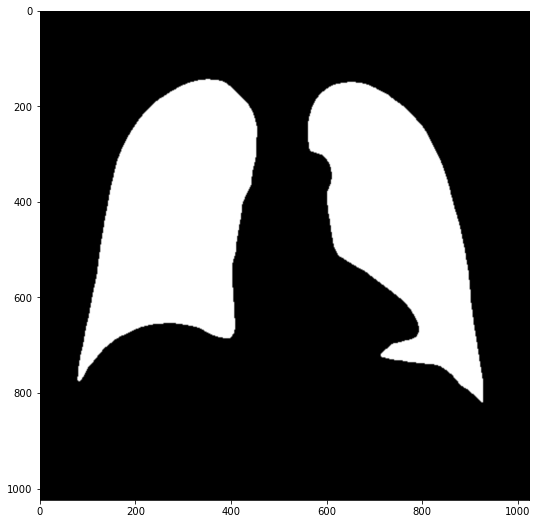

In [6]:
from purelung.augmentations import SegType
augmentation = aug.Segmentation(type=SegType.LUNGS) # by default
augmented = augmentation(image=chest_img)['image']
show_image(augmented)

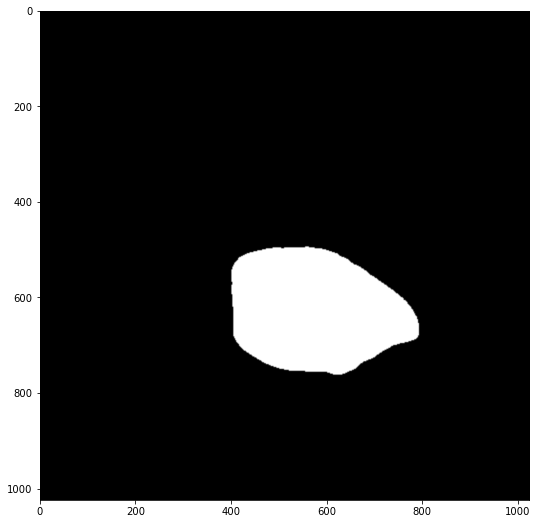

In [7]:
from purelung.augmentations import SegType
augmentation = aug.Segmentation(type=SegType.HEART) 
augmented = augmentation(image=chest_img)['image']
show_image(augmented)

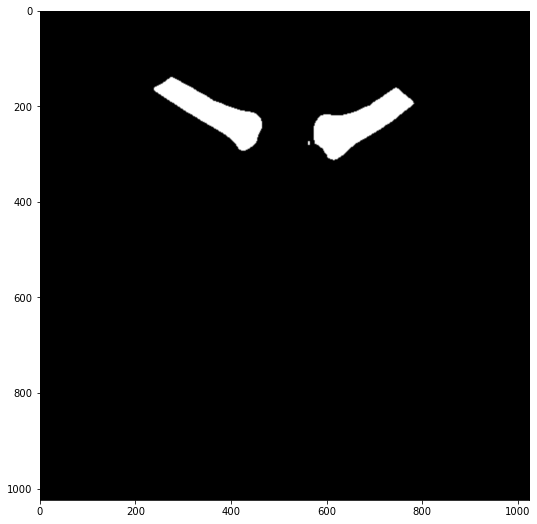

In [8]:
from purelung.augmentations import SegType
augmentation = aug.Segmentation(type=SegType.CLAVICLES)
augmented = augmentation(image=chest_img)['image']
show_image(augmented)

--------------------------------------

### Positive

Class `Positive()` used for auto inverse of the Chest X-ray images.

`targets` : image, mask, bbox, key points.

`image types` : uint8.

Image inverted.


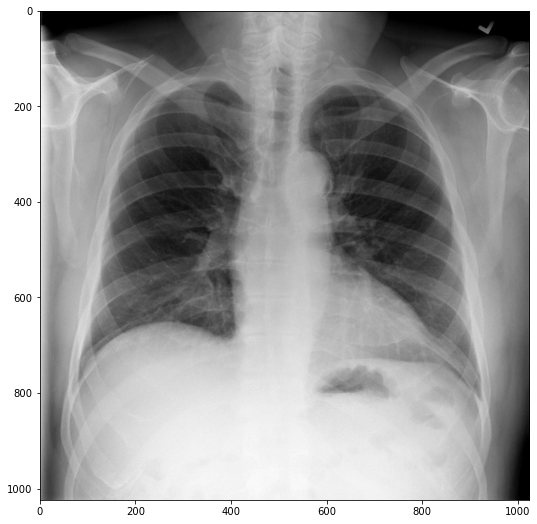

In [9]:
augmentation = aug.Positive()
# the given image is positive, so make it negative for the test 
inversed = np.invert(chest_img)
augmented = augmentation(image=inversed)['image']
show_image(augmented)

--------------------------------------

### Albumentations

`Purelung` is albumentations-integrable so both classes can be treated as arguments of Composition function. 

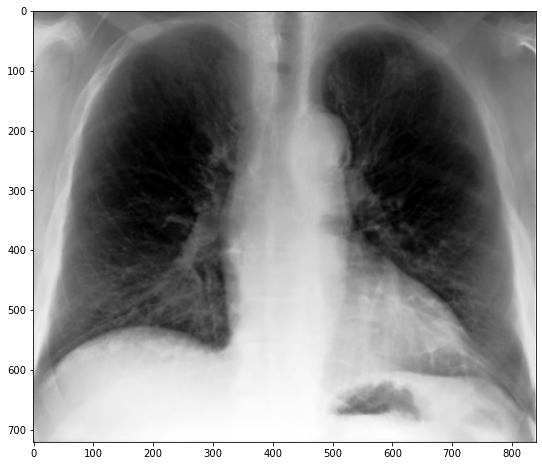

In [10]:
augmentation = A.Compose([aug.LungCrop(), aug.RibSuppression(), A.Equalize()])
augmented = augmentation(image=chest_img)['image']
show_image(augmented)